<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
#from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
boston_df=pd.read_csv(r'c:\Users\User\Downloads\boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [13]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median Values of Owner-occupied homes')

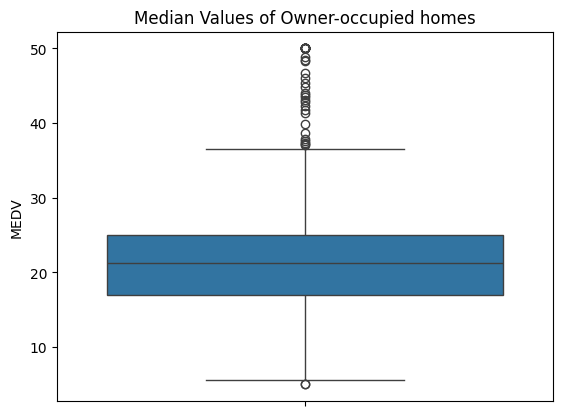

In [14]:
%matplotlib inline
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Values of Owner-occupied homes")

Text(0.5, 1.0, 'Number of homes near the Charles River')

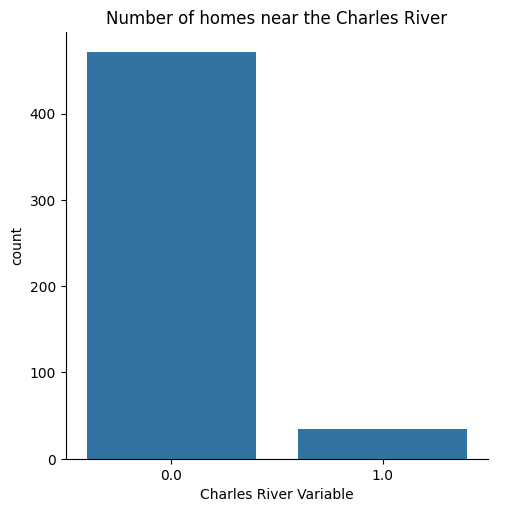

In [15]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Variable");
plt.title('Number of homes near the Charles River')

In [16]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

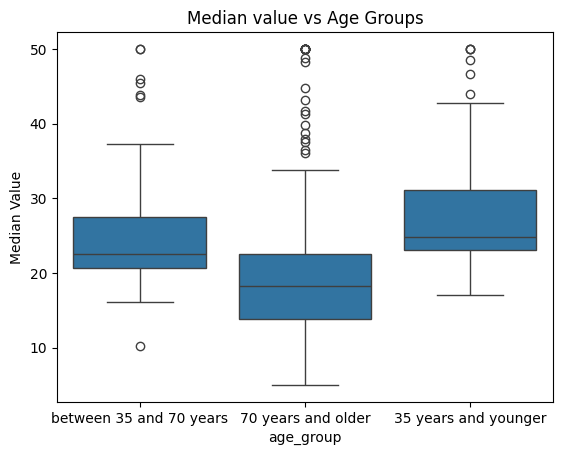

In [17]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

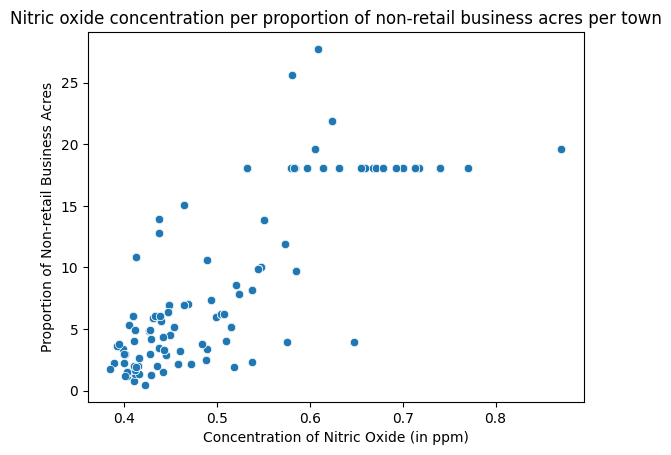

In [18]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");
plt.title('Nitric oxide concentration per proportion of non-retail business acres per town')

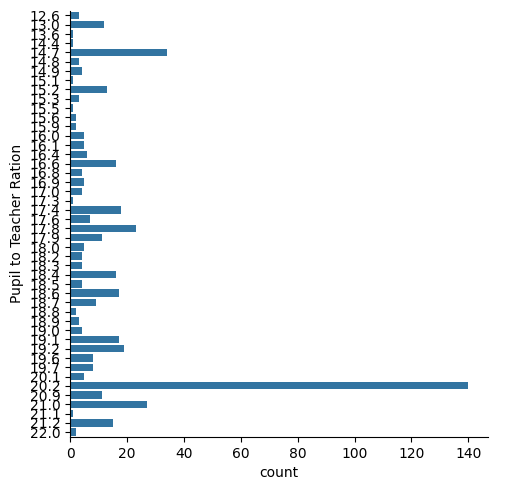

In [19]:
sns.catplot(y="PTRATIO", kind="count", data=boston_df)
plt.ylabel("Pupil to Teacher Ration");

Q6- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Hypothesis:
Null Hypothesis -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis -> There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [20]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(5) 

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR


In [21]:
#Levene test for equality of variance 
scipy.stats.levene(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'],
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], center='mean')
#(Since the p-value is less than 0.05 we can not assume equality of variance)   

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = False)
#Since the p-value is less than 0.05 we reject the null hypothesis,
#there is enough proof that there is a statistical difference in Median value of owner-occupied homes 
#based on Charles river variable

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Q7- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Hypothesis
Null Hypotesis: Mean1 = Mean2 = Mean3, so there is no statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis: At least one of the means differ, so there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [26]:
#Levene test
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
#Since the p-value is more than 0.05, the variances are not different

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [31]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [32]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
#Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence 
#that at least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Q8- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [34]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#Given the Pearson Coefficient is 0.76365 and p-value less than 0.05, 
#we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration 
#and proportion of non-retail business acres per town
#The positive relationship is confirmed also with the Scatter Plot (Question 4)

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)